In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Task 0
Read the dataset from csv file & perform data cleaning - remove all rows, which contains `?` in some columns.
Also check for data correctness (salary & salary $K).

In [101]:
db = pd.read_csv("../data/adult.csv")
db = db.replace("?", np.nan)
db = db.dropna()
db

,Unnamed: 0,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$
0,0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K,39
1,1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K,35
2,2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K,27
3,3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K,43
4,4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K,36
32557,32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K,173
32558,32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K,40
32559,32559,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K,38


In [167]:
db.describe()

,Unnamed: 0,age,hours-per-week,salary K$
count,30162.000000,30162.000000,30162.000000,30162.000000
mean,16287.103242,38.437902,40.931238,73.968570
std,9383.401676,13.134665,11.979984,85.365144
min,0.000000,17.000000,1.000000,15.000000
25%,8178.250000,28.000000,40.000000,26.000000
50%,16285.500000,37.000000,40.000000,38.000000
75%,24401.750000,47.000000,45.000000,49.000000
max,32560.000000,90.000000,99.000000,349.000000


# Task 1
Print the count of men and women in the dataset.

In [159]:
db["sex"].value_counts()

Male      20380
Female     9782
Name: sex, dtype: int64

# Task 2
Find the average age of men in dataset

In [161]:
round(db[db["sex"] == "Male"]["age"].mean(), 2)

39.18

# Task 3
Get the percentage of people from Poland (native-country)

In [206]:
round(db[db["native-country"] == "Poland"].shape[0] * 100 / db.shape[0], 3)

0.186

# Task 4
Get the mean and standard deviation of the age for people who earn > 50K per year. After this, get it for those who earn <= 50K.

In [163]:
# mean and standart deviation of the age for people who earn >50K per year#
mean = db[db["salary K$"] > 50]["age"].mean()
stdev = db[db["salary K$"] > 50]["age"].std()
f'Mean age- {round(mean)} and standart deviation- {round(stdev)} for people who earn > 50K per year'

'Mean age- 44 and standart deviation- 10 for people who earn > 50K per year'

In [164]:
# mean and standart deviation of the age for people who earn <=50K per year#
mean = db[db["salary K$"] <= 50]["age"].mean()
stdev = db[db["salary K$"] <= 50]["age"].std()
f'Mean age- {round(mean)} and standart deviation- {round(stdev)} for people who earn <= 50K per year'

'Mean age- 37 and standart deviation- 13 for people who earn <= 50K per year'

# Task 5
Check, if there are some people without higher education (education: Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate), but with > 50K salary

In [106]:
db[(~db["education"].isin(["Bachelors", "Prof-school", "Assoc-acdm", "Assoc-voc", "Masters", "Doctorate"])) & (db["salary K$"] > 50)]

,Unnamed: 0,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$
7,7,52,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,>50K,307
10,10,37,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,Black,Male,80,United-States,>50K,116
55,55,43,Private,Some-college,Married-civ-spouse,Tech-support,Husband,White,Male,40,United-States,>50K,341
67,67,53,Private,HS-grad,Married-civ-spouse,Adm-clerical,Wife,White,Female,40,United-States,>50K,225
68,68,49,Self-emp-inc,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,50,United-States,>50K,194
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32462,32462,48,Self-emp-inc,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,50,United-States,>50K,343
32518,32518,57,Local-gov,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,40,United-States,>50K,116
32519,32519,46,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,48,United-States,>50K,239
32557,32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K,173


# Task 6
Get the statistics of age for each type of education. Use `groupby` and `describe` for this.

In [111]:
db.drop(columns="Unnamed: 0").groupby("education").describe().T


education                   10th         11th        12th     1st-4th  \
age            count  820.000000  1048.000000  377.000000  151.000000   
               mean    37.897561    32.363550   32.013263   44.622517   
               std     16.225795    15.089307   14.373710   14.929051   
               min     17.000000    17.000000   17.000000   19.000000   
               25%     23.000000    18.000000   19.000000   33.000000   
               50%     36.000000    28.500000   28.000000   44.000000   
               75%     52.000000    43.000000   41.000000   56.000000   
               max     90.000000    90.000000   79.000000   81.000000   
hours-per-week count  820.000000  1048.000000  377.000000  151.000000   
               mean    37.464634    34.193702   35.697613   38.377483   
               std     13.387891    13.842603   12.992585   13.141153   
               min      1.000000     2.000000    6.000000    4.000000   
               25%     32.750000    20.000000   27.000000   35.000000   
               50%     40.000000    40.000000   40.000000   40.000000   
               75%     40.000000    40.000000   40.000000   40.000000   
               max     99.000000    99.000000   99.000000   96.000000   
salary K$      count  820.000000  1048.000000  377.000000  151.000000   
               mean    43.912195    41.527672   42.761273   37.556291   
               std     47.890388    46.846283   47.213033   34.351446   
               min     15.000000    15.000000   15.000000   15.000000   
               25%     25.000000    24.000000   24.000000   24.000000   
               50%     33.000000    32.000000   33.000000   31.000000   
               75%     43.000000    42.000000   43.000000   41.500000   
               max    347.000000   345.000000  349.000000  279.000000   

education                5th-6th     7th-8th         9th   Assoc-acdm  \
age            count  288.000000  557.000000  455.000000  1008.000000   
               mean    41.649306   47.631957   40.303297    37.286706   
               std     14.754622   15.737479   15.335754    10.509755   
               min     17.000000   17.000000   17.000000    19.000000   
               25%     28.000000   34.000000   28.000000    29.000000   
               50%     41.000000   49.000000   38.000000    36.000000   
               75%     53.000000   60.000000   53.000000    44.000000   
               max     82.000000   90.000000   90.000000    90.000000   
hours-per-week count  288.000000  557.000000  455.000000  1008.000000   
               mean    38.798611   40.131059   38.767033    41.184524   
               std     10.147745   13.350790   10.514654    11.524064   
               min      3.000000    2.000000    5.000000     2.000000   
               25%     40.000000   38.000000   39.500000    40.000000   
               50%     40.000000   40.000000   40.000000    40.000000   
               75%     40.000000   40.000000   40.000000    45.000000   
               max     75.000000   99.000000   99.000000    99.000000   
salary K$      count  288.000000  557.000000  455.000000  1008.000000   
               mean    39.857639   42.095153   43.028571    75.566468   
               std     42.081933   47.388376   50.022784    87.291460   
               min     15.000000   15.000000   15.000000    15.000000   
               25%     23.000000   24.000000   24.500000    26.000000   
               50%     33.000000   32.000000   33.000000    38.000000   
               75%     43.000000   42.000000   42.000000    61.250000   
               max    347.000000  347.000000  349.000000   349.000000   

education               Assoc-voc    Bachelors   Doctorate      HS-grad  \
age            count  1307.000000  5044.000000  375.000000  9840.000000   
               mean     38.246366    38.641554   47.130667    38.640955   
               std      11.181253    11.577566   11.471727    13.067730   
               min      19.000000    19.000000  

# Task 7
Compare the married and non-married men salaries. Who earns more? (>50K or <=50K)
Married men are those, whom `marital-status` starts with "Married". Others are not.

Text(0.5, 1.0, 'Comparison of Salaries: Married vs Non-Married')

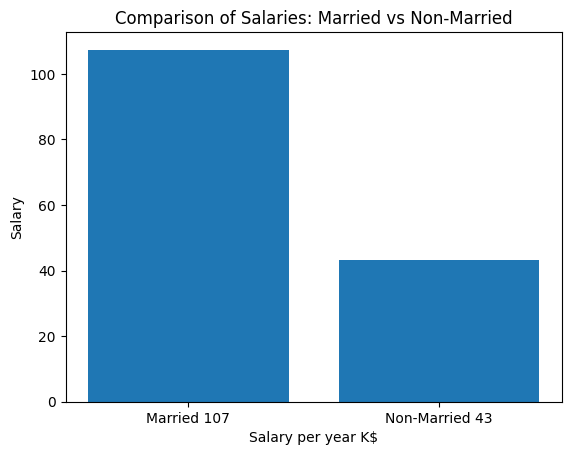

In [156]:
married = db[db["marital-status"].str.startswith("Married")]["salary K$"].mean()
not_married = db[~db["marital-status"].str.startswith("Married")]["salary K$"].mean()

labels = np.array([f'Married {round(married)}', f'Non-Married {round(not_married)}'])

heights = np.array([married, not_married])

plt.bar(labels, heights)
plt.xlabel('Salary per year K$')
plt.ylabel('Salary')
plt.title('Comparison of Salaries: Married vs Non-Married')

# Task 8
Get the max hours per week some person works. How many people works the same amount of hours per week?

In [177]:
max_hours = np.max(db["hours-per-week"])
num_of_people = db[db["hours-per-week"] == max_hours]["hours-per-week"].count()
f'Max hours per week- {max_hours}, {num_of_people}- people works the same amount of hours per week'

'Max hours per week- 99, 78- people works the same amount of hours per week'

# Task 9
Analyze the correlation between data in dataset. Understand connected fields in it and print highlight thier connection.

In [179]:
db.drop(columns="Unnamed: 0").corr()

,age,hours-per-week,salary K$
age,1.000000,0.101599,0.208203
hours-per-week,0.101599,1.000000,0.196378
salary K$,0.208203,0.196378,1.000000


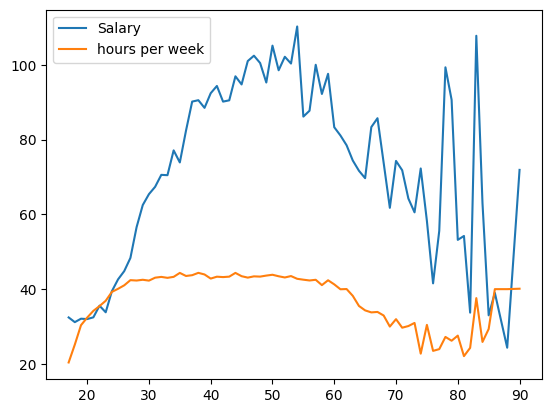

In [189]:
plt.plot(db.groupby("age")["salary K$"].mean())
plt.plot(db.groupby("age")["hours-per-week"].mean())
plt.legend(('Salary', 'hours per week'))

So as we can see
Whe have strong correlation between salary and age of workers
from 17 years old till 55 salary is growing proportionaly to the age
hours have smaller correlation with the age and small correlation between hours per week and salary
also We can see direct correlation between degree and salary

In [205]:
db.groupby("education")["salary K$"].mean().sort_values()

education
Preschool        32.644444
1st-4th          37.556291
5th-6th          39.857639
11th             41.527672
7th-8th          42.095153
12th             42.761273
9th              43.028571
10th             43.912195
HS-grad          60.345122
Some-college     65.799341
Assoc-acdm       75.566468
Assoc-voc        76.102525
Bachelors       102.832276
Masters         124.615243
Doctorate       156.080000
Prof-school     156.715867
Name: salary K$, dtype: float64